In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [118]:
# 1 Загрузите файл HR.csv в pandas dataframe
company = pd.read_csv('hr.csv')
company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [127]:
# 2 Рассчитайте основные статистики для переменных
company.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [129]:
# 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных
quantit_company = company.drop(['left', 'sales', 'salary'], axis=1)
quantit_company.corr()
# две самы скоррелированные  переменые average_montly_hours и  number_project
# две самые не скоррелированные  переменые number_project и satisfaction_level

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


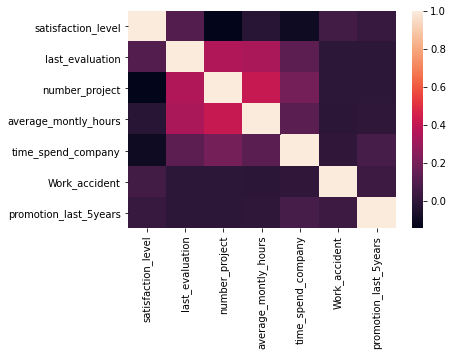

In [134]:
sns.heatmap(quantit_company.corr())

In [235]:
#4 Рассчитать сколько работников работает в каждом департаменте
sales_ = company.groupby('sales')[['salary']].count()
sales_

,salary
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


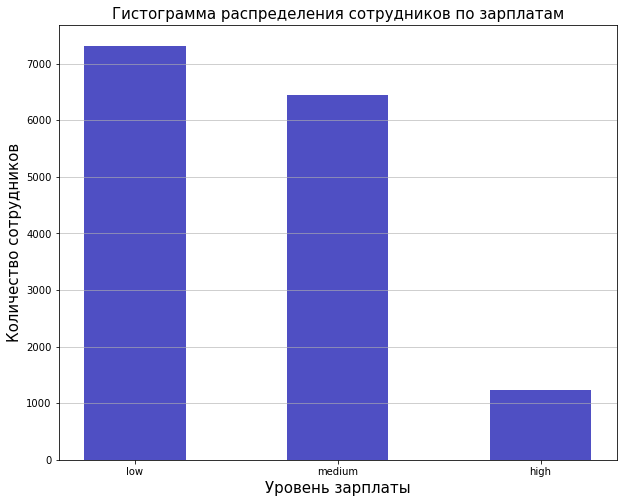

In [226]:
salary_ = company.groupby('salary').count().sales.sort_values(ascending = False)
plt.figure(figsize=[10,8])
plt.bar(salary_.keys(), salary_.values, width = 0.5, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Уровень зарплаты',fontsize=15)
plt.ylabel('Количество сотрудников',fontsize=15)
plt.title('Гистограмма распределения сотрудников по зарплатам',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Гистограмма распределения сотрудников по зарплатам и дупартаментам')

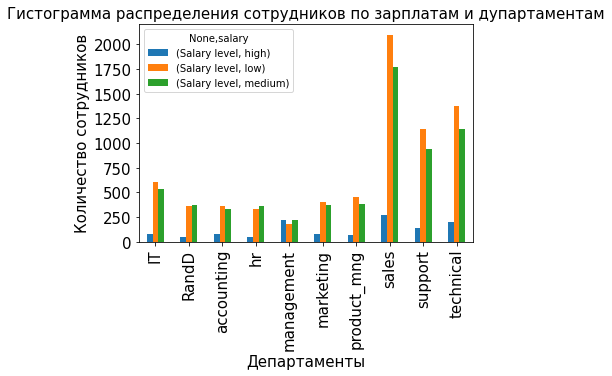

In [253]:
# 5 Показать распределение сотрудников по зарплатам
# 6 Показать распределение сотрудников по зарплатам совместно с департаментами
salary_departm = company.groupby(['sales', 'salary']).count()[['left']].rename(columns={'left': "Salary level"})
salary_departm.unstack().plot(kind='bar',fontsize=15)
plt.ylabel('Количество сотрудников',fontsize=15)
plt.xlabel('Департаменты',fontsize=15)
plt.title('Гистограмма распределения сотрудников по зарплатам и дупартаментам',fontsize=15)

In [224]:
# 5 Показать распределение сотрудников по зарплатам
#salary_ = company.sort_values('salary', ascending=False)
#salary_

In [124]:
# 6 Показать распределение сотрудников по зарплатам совместно с департаментами
salary_departm = company.sort_values(by=['salary', 'sales'])
salary_departm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1281,0.75,0.88,5,270,5,0,1,0,IT,high
1359,0.46,0.46,2,145,3,0,1,0,IT,high
1437,0.40,0.53,2,155,3,0,1,0,IT,high
1515,0.72,0.99,5,257,5,0,1,0,IT,high
3192,0.49,0.76,5,237,3,0,0,0,IT,high
...,...,...,...,...,...,...,...,...,...,...
14979,0.09,0.93,6,296,4,0,1,0,technical,medium
14982,0.38,0.49,2,137,3,0,1,0,technical,medium
14983,0.72,0.84,5,257,5,0,1,0,technical,medium
14984,0.40,0.56,2,148,3,0,1,0,technical,medium


In [219]:
# 7 Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

high_salary = company.loc[company['salary'] == 'high'].sample(n=1000)
low_salary = company.loc[company['salary'] == 'low'].sample(n=1000)
alpha = 0.05
result = stats.ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'], equal_var = False)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, зарплата влияет на колличество часов')
else:
    print('Не отвергаем нулевую гипотезу,мы не можем утвержать что ЗП приводит к разному количеству часов')

Ttest_indResult(statistic=-0.5361317884107243, pvalue=0.5919273831634764)
Не отвергаем нулевую гипотезу,мы не можем утвержать что ЗП приводит к разному количеству часов


In [126]:
# 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
left_company = company[ (company['left']== 1)]
in_company = company[ (company['left']== 0)]
totalA = len(in_company)
with_promotionA = len(in_company[ (in_company['promotion_last_5years'] == 1)])
perset_with_promoA = round((with_promotionA*100)/totalA)
print('доля оставшихся сотрудников с повышением за последние 5 лет', perset_with_promoA, '%')
print('Средняя степень удовлетворенности оставшихся сотрудников', in_company.satisfaction_level.mean())
print('Среднее количество проектов оставшихся сотрудников',in_company.number_project.mean() )

totalB = len(left_company)
with_promotionB = len(left_company[ (left_company['promotion_last_5years'] == 1)])
perset_with_promoB = round((with_promotionB*100)/totalB)
print('доля уволившихся сотрудников с повышением за последние 5 лет', perset_with_promoB, '%')
print('Средняя степень удовлетворенности уволившихся сотрудников', left_company.satisfaction_level.mean())
print('Среднее количество проектов уволившихся сотрудников',left_company.number_project.mean() )

доля оставшихся сотрудников с повышением за последние 5 лет 3 %
Средняя степень удовлетворенности оставшихся сотрудников 0.666809590479516
Среднее количество проектов оставшихся сотрудников 3.786664333216661
доля уволившихся сотрудников с повышением за последние 5 лет 1 %
Средняя степень удовлетворенности уволившихся сотрудников 0.44009801176140917
Среднее количество проектов уволившихся сотрудников 3.8555026603192384
